In [ ]:
#to throw it back together
Clusterdf['cluster'] = results.labels_

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
crime = pd.read_csv('C:/Users/sabri/Documents/GitHub/NewYorkCityCrimes2015/Lab3_Individual_Files/Sabrina/FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crime.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06,842416.000000,1.048510e+06,1.048510e+06,1.048510e+06,1.016123e+06,1.016157e+06,1.016124e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01,3.328113,1.359763e+01,1.552258e+01,2.014346e+03,5.844382e+01,6.444581e+00,6.199925e+00
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02,5.232735,2.331575e+02,8.803343e+00,8.898275e-01,2.079365e+01,1.441555e+00,2.031922e+00
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01,0.000000,-2.410000e+02,1.000000e+00,1.910000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01,1.000000,0.000000e+00,8.000000e+00,2.014000e+03,4.600000e+01,6.000000e+00,5.000000e+00
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01,1.000000,0.000000e+00,1.500000e+01,2.014000e+03,5.600000e+01,6.000000e+00,6.000000e+00
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01,2.000000,1.000000e+00,2.300000e+01,2.015000e+03,7.600000e+01,7.000000e+00,8.000000e+00
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01,24.000000,3.822300e+04,3.100000e+01,2.015000e+03,9.900000e+01,1.000000e+01,1.000000e+01


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

In [5]:
#drop Geocell and coordinate data
if 'Latitude' in crime:    
    del crime['Latitude'] 
if 'Longitude' in crime:    
    del crime['Longitude'] 
if 'Geocell' in crime:    
    del crime['Geocell'] 
if 'Geocell_X' in crime:    
    del crime['Geocell_X'] 
if 'Geocell_Y' in crime:    
    del crime['Geocell_Y'] 
if 'X_COORD_CD' in crime:
    del crime['X_COORD_CD']
if 'Y_COORD_CD' in crime:
    del crime['Y_COORD_CD']

In [6]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='OFNS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='CRM_ATPT_CPTD_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='LAW_CAT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [7]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'OFNS_DESC' in crime:    
    del crime['OFNS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'CRM_ATPT_CPTD_CD' in crime:    
    del crime['CRM_ATPT_CPTD_CD'] # get rid of the original category as it is now one-hot encoded
if 'LAW_CAT_CD' in crime:    
    del crime['LAW_CAT_CD'] # get rid of the original category as it is now one-hot encoded


In [8]:
pd.set_option('display.max_rows', 300)
crime.dtypes

CMPLNT_NUM                                      int64
CMPLNT_FR_DT                                   object
CMPLNT_FR_TM                                   object
CMPLNT_TO_DT                                   object
CMPLNT_TO_TM                                   object
RPT_DT                                         object
KY_CD                                           int64
PD_CD                                         float64
PD_DESC                                        object
PARKS_NM                                       object
HADEVELOPT                                     object
Lat_Lon                                        object
Start_Dt_Tm                                    object
End_Dt_Tm                                      object
Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                     

In [9]:
#dropping variables that don't add value or have sizeable missing values
if 'CMPLNT_NUM' in crime: #randomly assigned case id
    del crime['CMPLNT_NUM']
if 'CMPLNT_FR_DT' in crime:  #Date and time references have been binned
    del crime['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in crime:
    del crime['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in crime:
    del crime['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in crime:
    del crime['CMPLNT_TO_TM']
if 'Start_Dt_Tm' in crime:
    del crime['Start_Dt_Tm']
if 'End_Dt_Tm' in crime:
    del crime['End_Dt_Tm']
if 'RPT_DT' in crime:   #this is an unknown at the time of the crime in many cases
    del crime['RPT_DT']
if 'PD_DESC' in crime:  #duplicate information from PD_CD
    del crime['PD_DESC']
if 'Lat_Lon' in crime:
    del crime['Lat_Lon']
if 'PARKS_NM' in crime:    
    del crime['PARKS_NM']
if 'HADEVELOPT' in crime:    
    del crime['HADEVELOPT']
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC']

In [10]:
#dropping any remaining NANs
crime = crime.dropna() 

In [11]:
crime.isnull().values.any()
crime.isnull().sum().sum()

0

***Once done, come back and drop the next three columns and change x1=sample to x1=crime***

In [17]:
#sample the dataset
sample = crime.sample(frac =.05) 

In [18]:
#creating an unmodified dataframe
crime_df = sample

In [19]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40896 entries, 359753 to 490963
Columns: 236 entries, KY_CD to LAW_CAT_CD_Night
dtypes: float64(8), int64(1), uint8(227)
memory usage: 12.0 MB


In [15]:
X1=sample

https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

In [24]:
import numpy as np
import pandas as pd
#May throw this away if code below doesn't execute
X1.to_numpy()

array([[351., 259.,   1., ...,   0.,   1.,   0.],
       [341., 333.,   1., ...,   0.,   0.,   0.],
       [107., 221.,   8., ...,   0.,   1.,   0.],
       ...,
       [105., 386.,   1., ...,   0.,   0.,   1.],
       [578., 637.,   1., ...,   1.,   0.,   0.],
       [236., 782.,   1., ...,   0.,   0.,   0.]])

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [26]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X1) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame - code below fails as a dataframe - needs to be array
#X_normalized = pd.DataFrame(X_normalized) 

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

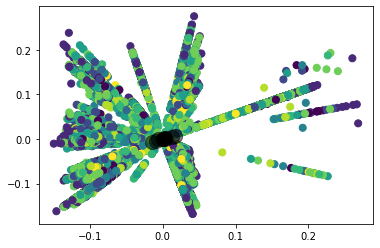

In [28]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

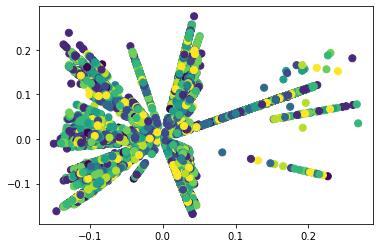

In [29]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X_normalized, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X_normalized.shape[0])[:n_clusters]
    centers = X_normalized[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X_normalized, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X_normalized[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X_normalized, 10)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_normalized)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
labels

In [ ]:
df = pd.DataFrame(labels)
print(df)

In [ ]:
sample_labeled = sample.append(df, ignore_index=False)
sample_labeled.head()

In [ ]:
sample_labeled.to_csv('sample_labeled.csv')

https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

In [18]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(sample) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

             P1            P2
0   6324.686552   8516.793991
1 -51543.002627 -15388.491207
2  49816.455609   8824.435180
3 -41646.625790  13564.120004
4 -18229.606426 -13088.262913


In [19]:
db_default = DBSCAN(eps = 0.0375, min_samples = 20).fit(X_principal) 
labels = db_default.labels_ 

In [20]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
colors = ['r', 'g', 'b', 'k' ] 

# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

KeyError: 3

In [ ]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_ 

In [ ]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 

In [23]:
# an example using SpectralClustering, which assumes that the graphical data needs to be calculated from the structure
from sklearn.cluster import SpectralClustering

X = X1
nclust = 10

# If a string, this may be one of 
#  ‘nearest_neighbors’, ‘precomputed’, ‘rbf’ 
#  or one of the kernels supported by sklearn.metrics.pairwise_kernels
spc = SpectralClustering(n_clusters=nclust, affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


TypeError: '(slice(None, None, None), 0)' is an invalid key

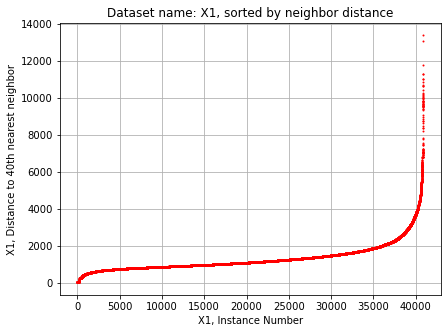

In [24]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X1_N = 40
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(X1, X1_N, mode='distance') # calculate distance to four nearest neighbors 

N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1, sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.grid()

plt.show()

In [25]:
from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X1_minpts = 500 
X1_eps = 3
#=====================================

for i, (data, minpts, eps) in enumerate(zip([X1],[X1_minpts],[X1_eps])):

    db = DBSCAN(eps=eps, min_samples=minpts).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # mark the samples that are considered "core"
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    plt.figure(figsize=(15,4))
    unique_labels = set(labels) # the unique labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 1080x288 with 0 Axes>